# Unsupervised Learning

## Limit of K-Means:
1. need to specify number of clusters.
2. run the algorithm several times to avoid suboptimal solutions.
3. performance degradation when clusters have varying sizes, different densities, or nonspherical shapes.

## Example: Nonspherical shapes

In [16]:
import numpy as np

In [17]:
from sklearn.cluster import KMeans

In [18]:
import matplotlib.pyplot as plt

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [20]:
from sklearn.datasets import make_blobs

## Create dataset

In [21]:
#make_blobs: generate isotropic Gaussian blobs for clustering.
#arg n_samples: total number of points equally divided among clusters. 
#arg n_features (default=2): number of features for each sample.
#arg centers: number of centers to generate, or the fixed center locations.

In [22]:
#generate three clusters
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)  #two clusters: fixed center locations
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))  #projection of X1 on two vectors (column-matrix)
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)  #single cluster
X2 = X2 + [6, -8]  #translate X2
X = np.r_[X1, X2]  #add rows of X1 and X2
y = np.r_[y1, y2+2]  #add rows of y1 and y2; caution: third cluster needs different label: y2=2

In [23]:
np.unique(y)

array([0, 1, 2])

In [24]:
c1=np.round(np.mean(X[y==0], axis=0),1)
c2=np.round(np.mean(X[y==1], axis=0),1)
c3=np.round(np.mean(X[y==2], axis=0),1)
c=[c1,c2,c3]; c

[array([-1.4,  1.4]), array([0.1, 0.1]), array([3.5, 1. ])]

In [25]:
def plot_clusters(X, y, center, size):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=size)          #first cluster
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=size, c='r')   #second cluster
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], s=size, c='g')   #third cluster
    plt.scatter(center[0][0], center[0][1], s=40, c='black', marker='x')   #center of first cluster
    plt.scatter(center[1][0], center[1][1], s=40, c='black', marker='x')   #center of second cluster
    plt.scatter(center[2][0], center[2][1], s=40, c='black', marker='x')   #center of third cluster
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("Original dataset", fontsize=14)

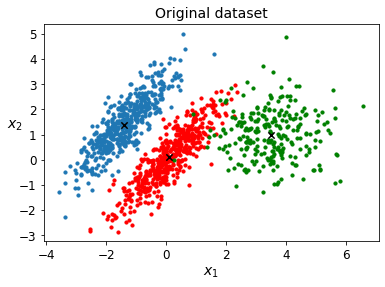

In [26]:
plot_clusters(X,y,center=c,size=10)  #differentiate three clusters

In [81]:
def plot_data(X, y, markersize):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=markersize)          #first cluster
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=markersize, c='r')   #second cluster
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], s=markersize, c='g')   #third cluster

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],  #coordinates x,y of centroids
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],  #coordinates x,y of centroids
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, y, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])  #column matrix: x-values, y_values; [x(i),y(i)] i=grid_index
    Z = Z.reshape(xx.shape)  #matrix of shape (1000, 1000)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),   #filled contours = contour areas; 
                cmap="Pastel1")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),    #contour lines = decision boundary
                linewidths=1, colors='k')
    plot_data(X, y, markersize=2)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

## Run KMeans

In [82]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)  #supported center
kmeans_bad = KMeans(n_clusters=3, random_state=42)  #non-supported center 
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

## Nonspherical shapes are not captured properly

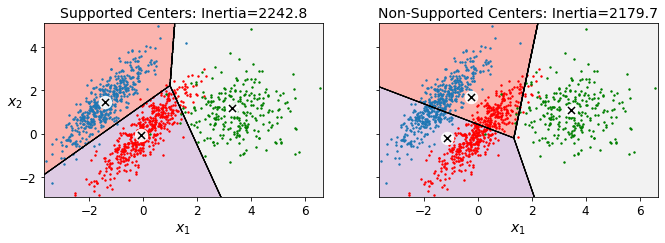

In [83]:
plt.figure(figsize=(11, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X, y)
plt.title("Supported Centers: Inertia={:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, y, show_ylabels=False)
plt.title("Non-Supported Centers: Inertia={:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()